In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (18.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123069 files and dir

# 1. 네이버 영화 리뷰 데이터셋
* 총 200,000개 리뷰로 구성된 데이터로, 영화 리뷰를 긍/부정으로 분류하기 위해 만들어진 데이터셋
* 리뷰가 긍정인 경우 1, 부정인 경우 0으로 표시한 레이블로 구성되어 있음


In [ ]:
import urllib.request
import pandas as pd

In [ ]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt', filename='ratings_train.txt') # 파일다운로드
urllib.request.urlretrieve('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt', filename='ratings_test.txt')

('ratings_test.txt', <http.client.HTTPMessage at 0x7f172eff1390>)

In [ ]:
train_dataset = pd.read_table('ratings_train.txt')
train_dataset

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [ ]:
len(train_dataset)

150000

# 2. 데이터 전처리

In [ ]:
# 결측치를 확인하고 결츨치를 제거
train_dataset.replace('', float('NaN'), inplace=True)
print(train_dataset.isnull().values.any())

train_dataset = train_dataset.dropna().reset_index(drop=True)
print(f'필터링된 데이터셋 총 개수: {len(train_dataset)}')

True
필터링된 데이터셋 총 개수: 149995


In [ ]:
# 열을 기준으로 중복 데이터를 제거
train_dataset = train_dataset.drop_duplicates(['document']).reset_index(drop=True)
print(f'필터링된 데이터셋 총 개수: {len(train_dataset)}')

필터링된 데이터셋 총 개수: 146182


In [ ]:
# 한글이 아닌 문자를 포함하는 데이터 제거(ㅋㅋㅋ 제거하지 않음)
train_dataset['document'] = train_dataset['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]', ' ')
print(f'필터링된 데이터셋 총 개수: {len(train_dataset)}')

<ipython-input-8-4bd13c41ca4c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_dataset['document'] = train_dataset['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]', ' ')


필터링된 데이터셋 총 개수: 146182


In [ ]:
# 너무 짧은 단어를 제거(단어의 길이가 2이하)
train_dataset['document'] = train_dataset['document'].apply(lambda x: ' '.join([token for token in x.split() if len(token) > 2]))
print(f'필터링된 데이터셋 총 개수: {len(train_dataset)}')

필터링된 데이터셋 총 개수: 146182


In [ ]:
# 전체 길이가 10이하이거나 전체 단어 개수가 5개 이하인 데이터를 제거
train_dataset = train_dataset[train_dataset.document.apply(lambda x: len(str(x)) > 10 and len(str(x).split()) > 5)].reset_index(drop=True)
print(f'필터링된 데이터셋 총 개수: {len(train_dataset)}')

필터링된 데이터셋 총 개수: 46785


In [ ]:
print(type(train_dataset))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
train_dataset = train_dataset.sample(n=6000, random_state=1)

In [ ]:
print(len(train_dataset))

6000


In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 18739 to 21220
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        6000 non-null   int64 
 1   document  6000 non-null   object
 2   label     6000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 187.5+ KB


In [ ]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 30.7 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Okt

In [ ]:
# 불용어 정의
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

In [ ]:
train_dataset = list(train_dataset['document'])
#train_dataset

In [ ]:
okt = Okt() #한국어 형태소 분석기

tokenized_data = [] #불용어 제거된 토큰화된 문장을 저장한다

for sentence in train_dataset:
  tokenized_sentence = okt.morphs(sentence, stem=True) #morphs를 이용해서 형태소 분리후 stem=True통해 단어의 원형을 추출
  stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]
  tokenized_data.append(stopwords_removed_sentence) #불용어가 제거된 토큰화된 문장을 tokenized_data에 저장

In [ ]:
tokenized_data[0]

['질',
 '낮다',
 '영화',
 '한편',
 '보다',
 '고생',
 '다행',
 '기',
 '대안',
 '하고',
 '실망',
 '안',
 '에테르',
 '궁금하다',
 '만들다',
 '아니다',
 '답답하다',
 '만들다',
 '주인공',
 '행동',
 '유치하다']

리뷰의 최대 길이:  52
리뷰의 평균 길이:  15.656666666666666


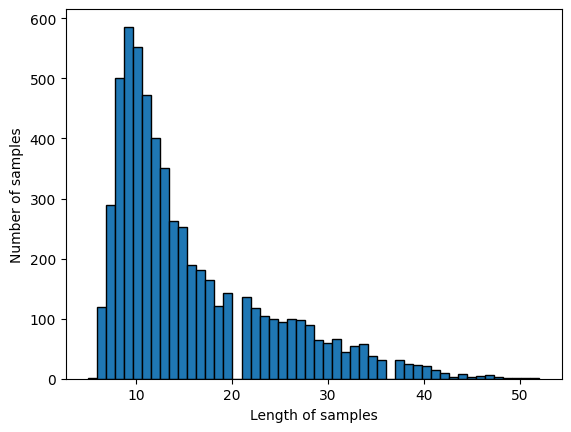

In [ ]:
import matplotlib.pyplot as plt

print('리뷰의 최대 길이: ', max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이: ', sum(map(len, tokenized_data)) / len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50,edgecolor='black')
plt.xlabel('Length of samples')
plt.ylabel('Number of samples')
plt.show()



# 3. 워드 임베딩 구축

In [ ]:
from gensim.models import Word2Vec

In [ ]:
embedding_dim = 100

# sg: 0(CBOW), 1(Skip-gram)

model = Word2Vec(
    sentences = tokenized_data,
    vector_size = embedding_dim,
    window = 5,
    min_count = 5,
    workers = 4, #쓰래드 숫자(동시에 작업하는 구간)
    sg = 0,
)

In [ ]:
# 임베딩 행렬의 크기 단어 사전에는 총 2628개의 단어가 존재하고, 각각의 단어는
# 미리설정한 embedding_dim= 100차원으로 구성
model.wv.vectors.shape

(2628, 100)

In [ ]:
word_vectors = model.wv
vocabs = list(word_vectors.index_to_key)
vocabs[:20]

['영화',
 '보다',
 '을',
 '이다',
 '있다',
 '적',
 '로',
 '없다',
 '에서',
 '좋다',
 '만',
 '아니다',
 '되다',
 '같다',
 '스토리',
 '나오다',
 '다',
 '생각',
 '인',
 '사람']

In [ ]:
for sim_word in model.wv.most_similar('영화'):
  print(sim_word)

('최악', 0.9994853138923645)
('다', 0.9994730949401855)
('이렇다', 0.9994580745697021)
('이영화', 0.9994133710861206)
('재미없다', 0.9994009137153625)
('없이', 0.9993987083435059)
('아니다', 0.9993941187858582)
('놀라다', 0.9993866682052612)
('급', 0.9993788599967957)
('라고', 0.9993757009506226)


In [ ]:
for sim_word in model.wv.most_similar('좋다'):
  print(sim_word)

('그래도', 0.9996352195739746)
('지만', 0.9996144771575928)
('아쉽다', 0.9996079206466675)
('씨', 0.9995923042297363)
('처럼', 0.9995883703231812)
('이나', 0.9995810389518738)
('여자', 0.9995794296264648)
('괜찮다', 0.9995777606964111)
('이라고', 0.9995771646499634)
('맞다', 0.9995753169059753)


# 4. 워드 임베딩 시각화


In [ ]:
import matplotlib.font_manager

In [ ]:
#나눔글꼴 확인
font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
[matplotlib.font_manager.FontProperties(fname=font).get_name() for font in font_list if 'Nanum' in font]

['NanumGothic',
 'NanumBarunGothic',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumMyeongjo',
 'NanumSquare',
 'NanumSquareRound',
 'NanumMyeongjo',
 'NanumSquare']

In [ ]:
plt.rc('font',family='NanumBarunGothic')

In [ ]:
word_vector_list = [word_vectors[word] for word in vocabs]
word_vector_list[0]

array([-0.16820504,  0.28002378, -0.01185031, -0.09273485,  0.01464482,
       -0.6650221 ,  0.19067697,  0.9833998 , -0.5056892 , -0.2524226 ,
       -0.11657078, -0.61754066, -0.17471325,  0.19060005,  0.18841313,
       -0.40662852,  0.14882559, -0.31433758, -0.17611659, -0.88725233,
        0.17160575, -0.00899574,  0.21582061, -0.17555535, -0.12555826,
        0.04199225, -0.4044184 , -0.419754  , -0.413925  ,  0.14590421,
        0.43938118,  0.11125295,  0.20363903, -0.3140063 , -0.12532678,
        0.5002853 , -0.00923552, -0.5001702 , -0.29456404, -0.756638  ,
       -0.00437073, -0.3724951 ,  0.02865506,  0.01548377,  0.25183165,
       -0.21825153, -0.34119642, -0.13538775,  0.22833037,  0.14357796,
        0.23928647, -0.35324788, -0.07956127, -0.0771478 , -0.3126128 ,
        0.22257507,  0.3375302 ,  0.10629144, -0.31959608,  0.03452446,
        0.06190541,  0.07810812, -0.17910352, -0.11612273, -0.64074206,
        0.63404614,  0.04979034,  0.39395854, -0.61832017,  0.56

In [ ]:
print(len(x_axis_tsne)) # 6000개의 리뷰에서 가져온 2628개의 단어
print(len(y_axis_tsne))

NameError: ignored

In [ ]:
x_axis_tsne #2628개의 단어의 좌표값

NameError: ignored

In [ ]:
# PCA가 자주 이용되는 차원 축소 방식이긴 하지만 군집의 변별력을 해친다는 단접이 있음
# PCA를 개선한 방법이 t-SNE 차원 축소 방식
# 고차원 데이터를 저차원으로 시각화하기 위한 알고리즘
# 고차원의 데이터는 직접적으로 시각화할 수 없기 때문에
from sklearn.manifold import TSNE


In [ ]:
import numpy as np
tsne = TSNE(learning_rate=100)

transformed = tsne.fit_transform(np.array(word_vector_list))

x_axis_tsne = transformed[:, 0]
y_axis_tsne = transformed[:, 1]

In [ ]:
def plot_tsne_graph(vocabs, x_asix, y_asix):
  plt.figure(figsize=(30, 30))
  plt.scatter(x_asix, y_asix, marker = 'o')
  for i, v in enumerate(vocabs):
    plt.annotate(v, xy=(x_asix[i], y_asix[i]))

In [ ]:
plot_tsne_graph(vocabs, x_axis_tsne, y_axis_tsne)

# 5.TSNE 고도화
* Python에서 제공하는 interactive visualization library인 [bokey](https://docs.bokeh.org/en/latest/)를 사용하여 시각화 고도화


In [ ]:
import pickle

In [ ]:
tsne_df = pd.DataFrame(transformed, columns=['x_coord', 'y_coord'])

In [ ]:
tsne_df

In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, value

In [ ]:
import matplotlib.font_manager as fm
font_list = [font.name for font in fm.fontManager.ttflist]
font_list


In [ ]:
from bokeh.io import curdoc
from bokeh.themes import Theme

curdoc().theme = Theme(json={
    "attrs": {
        "Plot": {"toolbar_location": None},
        "Grid": {"grid_line_color": None},
        "Axis": {
            "axis_line_color": None,
            "major_label_text_color": None,
            "major_tick_line_color": None,
            "minor_tick_line_color": None,
            'major_label_text_font': 'NanumBarunGothic'  # 적용하려는 폰트 이름
        },
        "Text": {
            'text_font': 'NanumBarunGothic'  # 적용하려는 폰트 이름
        },
    }
})



In [ ]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

In [ ]:
plt.rcParams['font.family'] = 'Nanum Brush Script'

In [ ]:
output_notebook()

In [ ]:
# prepare the data in a form suitable for bokeh.
plot_data = ColumnDataSource(tsne_df)
# create the plot and configure it
tsne_plot = figure(title='t-SNE Word Embeddings',
  plot_width = 800,
  plot_height = 800,
  active_scroll='wheel_zoom'
)
# add a hover tool to display words on roll-over
tsne_plot.add_tools( HoverTool(tooltips = '@word') )
tsne_plot.circle(
    'x_coord', 'y_coord', source=plot_data,
    color='red', line_alpha=0.2, fill_alpha=0.1,
    size=10, hover_line_color='orange'
  )
# adjust visual elements of the plot
tsne_plot.xaxis.visible = False
tsne_plot.yaxis.visible = False
tsne_plot.grid.grid_line_color = None
tsne_plot.outline_line_color = None
# show time!
show(tsne_plot);

In [ ]:
from gensim.models import KeyedVectors

In [ ]:
model.wv.save_word2vec_format('sample_word2vec_embedding')

In [ ]:
!python -m gensim.scripts.word2vec2tensor --input sample_word2vec_embedding --output sample_word2vec_embedding